In [23]:
#import cell
import numpy as np

<font color = black size = 6 >Incremental Search</font>
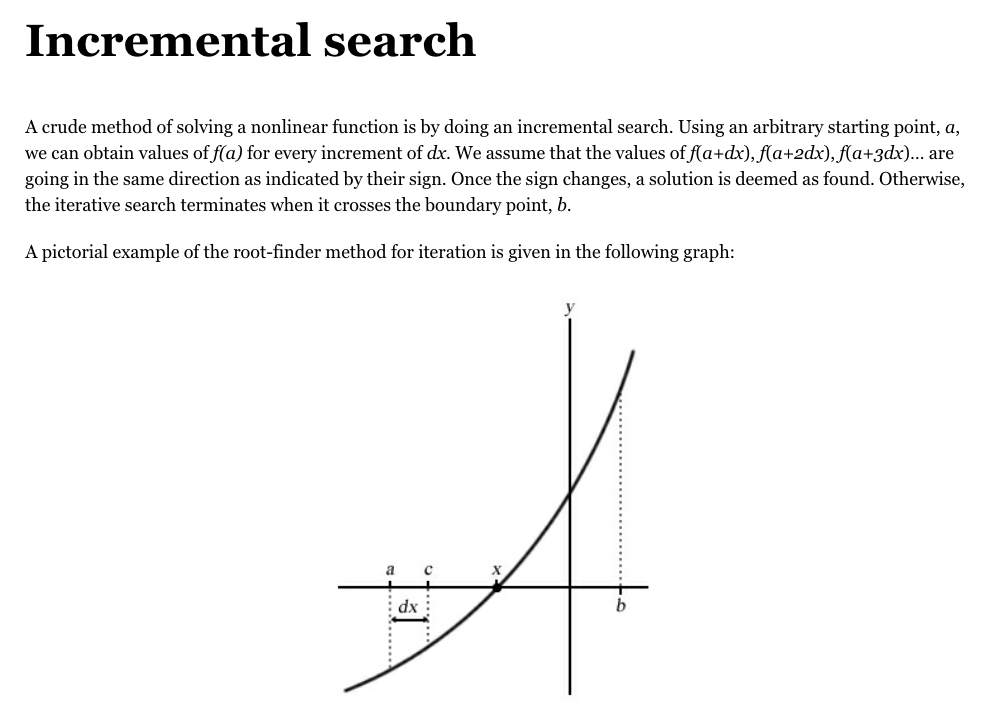

In [16]:
def incremental_search(func, a, b, dx):
    '''
    parameters:
    a: left boundary
    b: right boundary
    func: function expression| defined by lambda
    dx: unit of change
    '''
    fa = func(a)
    c = a + dx
    fc = func(c)
    iteration_n = 1 
    while np.sign(fa) == np.sign(fc):
        if a >= b:
            return a-dx, iteration_n
        
        a = c
        fa =fc
        c = a + dx
        fc = func(c)
        iteration_n += 1
        
    if func(a) == 0:
        return a, iteration_n
    elif func(c) == 0:
        return c, iteration_n
    else:
        return (a+c)/2., iteration_n

In [17]:
y = lambda x: x**3 + 2.*x**2 - 5.
#Equivalent to y(x) = x^3 + 2x^2 -5
root, iterations = incremental_search (y, -5., 5., 0.001)
print("Root is:", root)
print("Iterations:", iterations)
    

Root is: 1.2414999999999783
Iterations: 6242


<font color = black size = 6 >Bisection search</font>

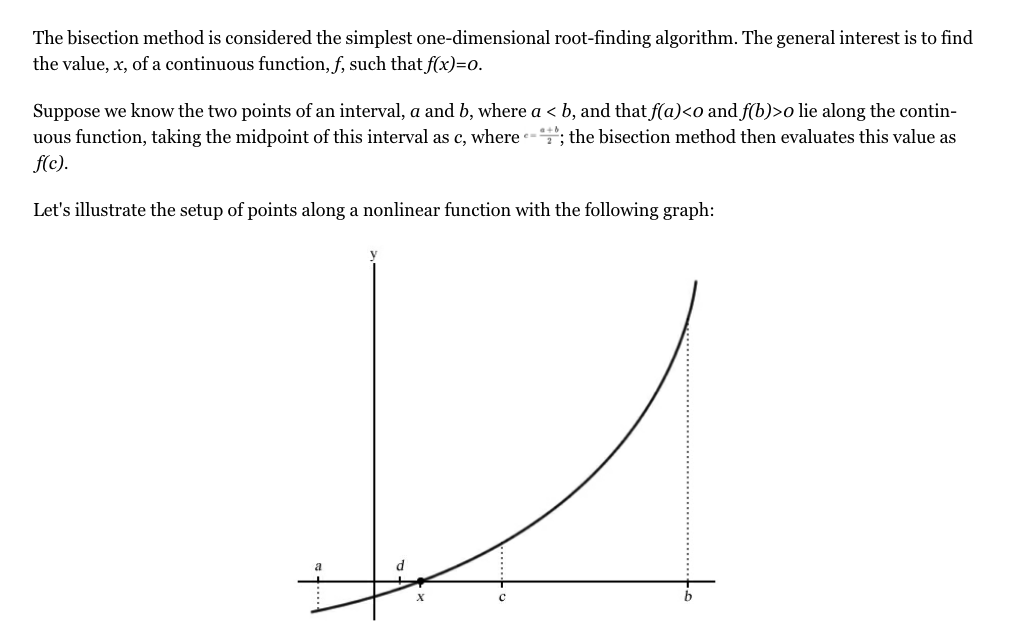

In [21]:
def bisection_search(func, a, b, tol = 0.1, maxiter=10):
    '''parameter:
    a: left boundary
    b: right boundary
    func: function expression
    tol: tolerance
    maxiter: maximum number of iterations
    '''
    if np.sign(func(a)) == np.sign(func(b)):
        print("Wrong a, b value, their sign have to be different")
        return
    iteration_n = 0
    c = (a+b)/2
    fc = func(c)
    while iteration_n < maxiter:
        if fc == 0 or abs(a-b)<= tol:
            return c, iteration_n
        elif fc < 0:
            a = c
            c = (a+b)/2
        else:
            b = c
            c = (a+b)/2
        fc = func(c)
        iteration_n +=1

        
        
    

In [22]:
#EXAMPLE
y = lambda x: x**3 + 2.*x**2 - 5
root, iterations = bisection_search(y, -5, 5, 0.00001, 100)
print("Root is:", root)
print("Iterations:", iterations)

    

Root is: 1.241898536682129
Iterations: 20


<font color = black size = 6 >Newton's method</font>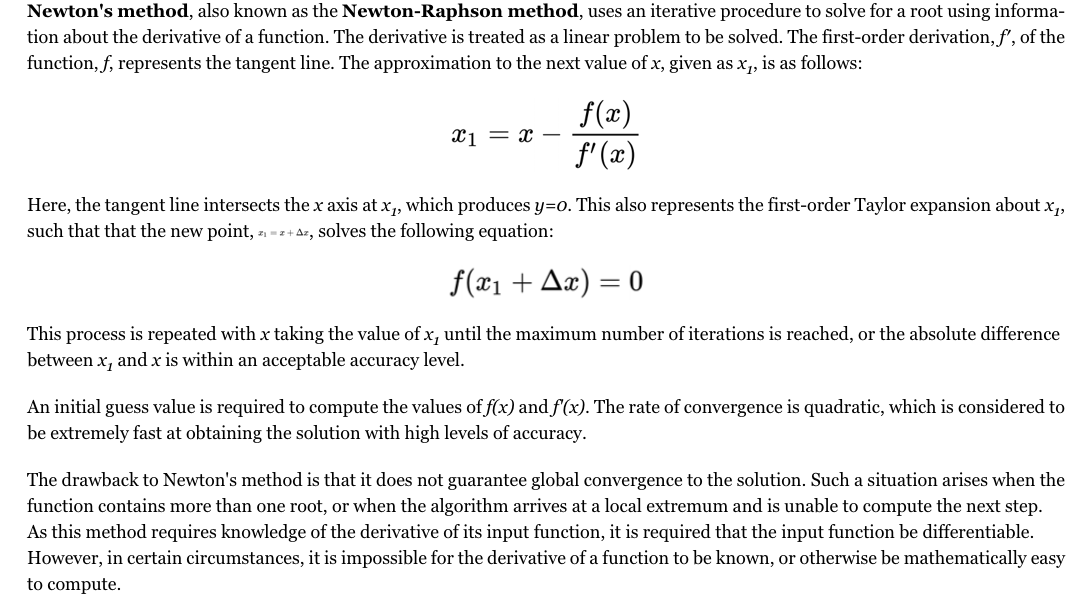


In [24]:
def newton(func, df, x, tol=0.001, maxiter=100):
        """
        :param func: The function to solve
        :param df: The derivative function of f
        :param x: Initial guess value of x
        :param tol: The precision of the solution
        :param maxiter: Maximum number of iterations
        :return: 
            The x-axis value of the root,
            number of iterations used
        """
        n = 1
        while n <= maxiter:
            x1 = x - func(x)/df(x)
            if abs(x1 - x) < tol: 
                return x1, n
            x = x1
            n += 1
        return None, n

    

In [25]:
y = lambda x: x**3 + 2*x**2 - 5
dy = lambda x: 3*x**2 + 4*x
root, iterations = newton(y, dy, 5.0, 0.00001, 100)
print("Root is:", root)
print("Iterations:", iterations)

    

Root is: 1.241896563034502
Iterations: 7


<font color = black size = 6 >Secant's method</font>
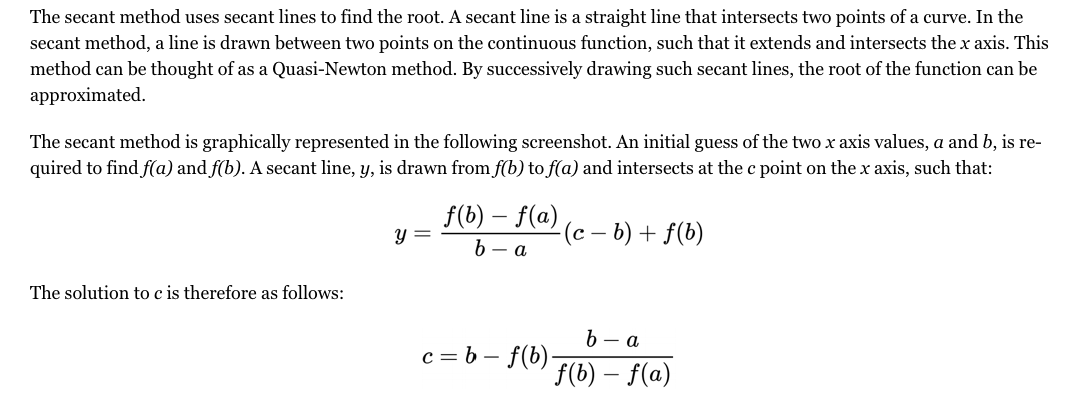

In [40]:
def secant(func, a, b, tol=0.001, maxiter=100):
        """
        :param func: The function to solve
        :param a: Initial x-axis guess value
        :param b: Initial x-axis guess value, where b>a
        :param tol: The precision of the solution
        :param maxiter: Maximum number of iterations
        :return: 
            The x-axis value of the root,
            number of iterations used
        """
        n = 1
        while n <= maxiter:
            c = b - func(b)*((b-a)/(func(b)-func(a)))
            if abs(c-b) < tol:
                return c, n
            a = b
            b = c
            n += 1
        return None, n


In [41]:
y = lambda x: x**3 + 2.*x**2 - 5.
root, iterations = secant(y, -5.0, 5.0, 0.00001, 100)
print("Root is:", root)
print("Iterations:", iterations)

    

Root is: 1.2418965622558549
Iterations: 14
